In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split

In [3]:
print(os.getcwd())

C:\Users\verle


In [4]:
os.chdir('D:/Machine Learning Projects')

In [5]:
# Reading csv file
df = pd.read_csv('Google Playstore Dataset/googleplaystore.csv')

In [6]:
#Cleaning the data
#Cleaning data for "Size" Column
#Syntax for map function map(func, iter)
#lambda is used for building complex logic for a new column or filter
df['Size'] = df['Size'].map(lambda x: x.rstrip('M'))
df['Size'] = df['Size'].map(lambda x: str(round((float(x.rstrip('k'))/1024), 1)) if x[-1]=='k' else x)
df['Size'] = df['Size'].map(lambda x: np.nan if x.startswith('Varies') else x)

#Cleaning data for "Installs" Column
df['Installs'] = df['Installs'].map(lambda x: x.rstrip('+'))
df['Installs'] = df['Installs'].map(lambda x: ''.join(x.split(',')))

#Cleaning data for "Price" Column
df['Price'] = df['Price'].map(lambda x: x.lstrip('$').rstrip())

#Removing row 10472 because of missing Category
df.drop(df.index[10472], inplace=True)

#Removing row 7312 and 8266 because of "Unrated" value in Content Rating
df.drop(df.index[[7312,8266]], inplace=True)

In [7]:
#We will have to sort the data since it is randomly sorted
df.sort_values("Category", inplace=True)

In [8]:
#For solving a regression problem we should convert strings into numberic values
#For Label encoding
lb_make = LabelEncoder()

#Creating column for "numeric" Content Rating
df["Content Rating Numeric"] = lb_make.fit_transform(df["Content Rating"])

#Making dictionary for Content rating with numeric values
dict_content_rating = {"Adults only 18+": 0, "Everyone": 1, "Everyone 10+": 2, "Mature": 3, "Teen": 4}

# Numeric value for Content Rating
#Comment for details
'''
Adults only 18+ = 0
Everyone = 1
Everyone 10+ = 2
Mature 17+ = 3
Teen = 4
'''
# Create column for "numeric" Category
df["Category Numeric"] = lb_make.fit_transform(df["Category"])

#Making dicitonary for Category with numeric values
#We have already sorted the dataset with respect to Category so it will give values 
dict_category = {}
val = 0
for i in df["Category"].unique():
    dict_category[i] = val
    val += 1
    
# Numeric value for Category
'''
ART_AND_DESIGN = 0
AUTO_AND_VEHICLES = 1
BEAUTY = 2 
BOOKS_AND_REFERENCE = 3
BUSINESS = 4
COMICS = 5
COMMUNICATION = 6
DATING = 7
EDUCATION = 8
ENTERTAINMENT = 9
EVENTS = 10
FAMILY = 11
FINANCE = 12
FOOD_AND_DRINK = 13
GAME = 14
HEALTH_AND_FITNESS = 15
HOUSE_AND_HOME = 16
LIBRARIES_AND_DEMO = 17
LIFESTYLE = 18
MAPS_AND_NAVIGATION = 19
MEDICAL = 20
NEWS_AND_MAGAZINES = 21
PARENTING = 22
PERSONALIZATION = 23
PHOTOGRAPHY = 24
PRODUCTIVITY = 25
SHOPPING = 26
SOCIAL = 27
SPORTS = 28
TOOLS = 29
TRAVEL_AND_LOCAL = 30
VIDEO_PLAYERS = 31
WEATHER = 32
'''

'\nART_AND_DESIGN = 0\nAUTO_AND_VEHICLES = 1\nBEAUTY = 2 \nBOOKS_AND_REFERENCE = 3\nBUSINESS = 4\nCOMICS = 5\nCOMMUNICATION = 6\nDATING = 7\nEDUCATION = 8\nENTERTAINMENT = 9\nEVENTS = 10\nFAMILY = 11\nFINANCE = 12\nFOOD_AND_DRINK = 13\nGAME = 14\nHEALTH_AND_FITNESS = 15\nHOUSE_AND_HOME = 16\nLIBRARIES_AND_DEMO = 17\nLIFESTYLE = 18\nMAPS_AND_NAVIGATION = 19\nMEDICAL = 20\nNEWS_AND_MAGAZINES = 21\nPARENTING = 22\nPERSONALIZATION = 23\nPHOTOGRAPHY = 24\nPRODUCTIVITY = 25\nSHOPPING = 26\nSOCIAL = 27\nSPORTS = 28\nTOOLS = 29\nTRAVEL_AND_LOCAL = 30\nVIDEO_PLAYERS = 31\nWEATHER = 32\n'

In [9]:
#We will now replace the NaN values in the data set with the mean value
#SimpleImputer replaces missing values with(NaN) with mean, median, constant or most_frequent value....By default it is set to mean
#Replacing "NaN" with mean value
imputer = SimpleImputer()
df['Rating'] = imputer.fit_transform(df[['Rating']])

#We will now round the mean value to 1 decimal point
df['Rating'].round(1)

#Drops the row where there is any missing value
df.dropna(axis=0, inplace=True)

In [10]:
#It is nessecary to have datatype of columns under consideration to be numerical
#So we will change the datatype to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'])
df['Installs'] = pd.to_numeric(df['Installs'])
df['Price'] = pd.to_numeric(df['Price'])

In [11]:
#We will plot a graph for better visualization to under the distribution of various categories using pie chart
# Pie chart for Category
value_category = np.zeros(33)
labels_category = df['Category'].unique()
for i in range(len(df['Category'])):
    try:
        value = df['Category'][i]
        num = dict_category[value]
        value_category[num] = value_category[num] + 1
    except:
        pass

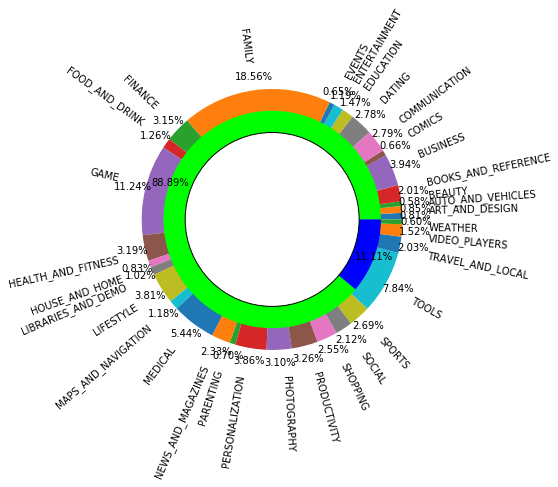

In [15]:
# We will categorize based on Free and paid counts for each category
#List for storing the values of free and paid count
free_paid_list = [] 
# 1st value = Free 
# 2nd value = Paid 
### Alternate values

#For loop for checking through each label_category
for j in labels_category:
    free_count = 0
    paid_count = 0
    for i in range(len(df['Type'])):
        try:
            if df['Category'][i] == j:
                if df['Type'][i] == "Free":
                    free_count += 1
                if df['Type'][i] == "Paid":
                    paid_count += 1
        except:
            pass
free_paid_list.append(free_count)
free_paid_list.append(paid_count)

colors_free_paid = []
free_color = "#00ff00" #Green Color
paid_color = "#0000ff" #Blue Color
for i in range(int(len(free_paid_list)/2)):
    colors_free_paid.append(free_color)
    colors_free_paid.append(paid_color)

plt.axis("equal")
plt.pie(value_category, labels = labels_category, radius = 1.5, autopct = '%0.2f%%', rotatelabels = True, pctdistance = 1.1, labeldistance = 1.2)
plt.pie(free_paid_list, colors = colors_free_paid, radius = 1.25, autopct = '%0.2f%%', pctdistance = 1.0)
centre_circle = plt.Circle((0,0), 1.0, color = 'black', fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#plt.tight_layout()
plt.show()

In [37]:
#All the possible values for Parenting and Education in Genres
list_parenting = []
list_education = []
for i in range(len(df['Category'])):
    try:
        if df['Category'][i] == 'PARENTING':
            value = df['Genres'][i]
            if value not in list_parenting:
                list_parenting.append(value)
        if df['Category'][i] == 'EDUCATION':
            value = df['Genres'][i]
            if value not in list_education:
                list_education.append(value)
    except:
        pass

['Parenting', 'Parenting;Education', 'Parenting;Brain Games', 'Parenting;Music & Video']
['Education', 'Education;Creativity', 'Education;Education', 'Education;Action & Adventure', 'Education;Pretend Play', 'Education;Brain Games']


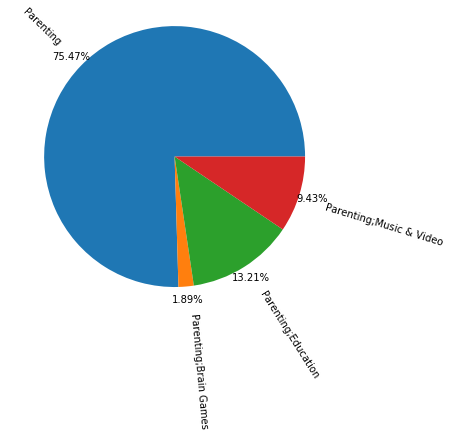

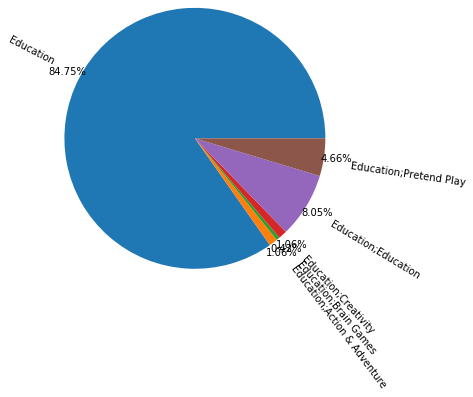

In [38]:
value_parenting = np.zeros(len(list_parenting))
labels_parenting = sorted(list_parenting)
value_education = np.zeros(len(list_education))
labels_education = sorted(list_education)

#Dictionary for shopping:
dict_parenting = {}
for i in range(len(labels_parenting)):
    dict_parenting[labels_parenting[i]] = i
    
#Dictionary for social:
dict_education = {}
for i in range(len(labels_education)):
    dict_education[labels_education[i]] = i
    
#Creating Pie chart for shopping category in Genres
for i in range(len(df['Genres'])):
    try:
        if df['Genres'][i] in labels_parenting:
            value = df['Genres'][i]
            num = dict_parenting[value]
            value_parenting[num] = value_parenting[num] + 1
    except:
        pass

plt.axis("equal")
plt.pie(value_parenting, labels=labels_parenting, radius=1.5, autopct='%0.2f%%', rotatelabels=True, pctdistance=1.1, labeldistance=1.2)
plt.show()

#Creating Pie chart for social category in Genres
for i in range(len(df['Genres'])):
    try:
        if df['Genres'][i] in labels_education:
            value = df['Genres'][i]
            num = dict_education[value]
            value_education[num] = value_education[num] + 1
    except:
        pass

plt.axis("equal")
plt.pie(value_education, labels=labels_education, radius=1.5, autopct='%0.2f%%', rotatelabels=True, pctdistance=1.1, labeldistance=1.2)
plt.show()